# Linear Regression


### Mục tiêu của mô hình là từ 10 biến đầu vào là những thông tin liên quan tới người bệnh bao gồm age, sex, body mass index, average blood pressure và 6 chỉ số blood serum.

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

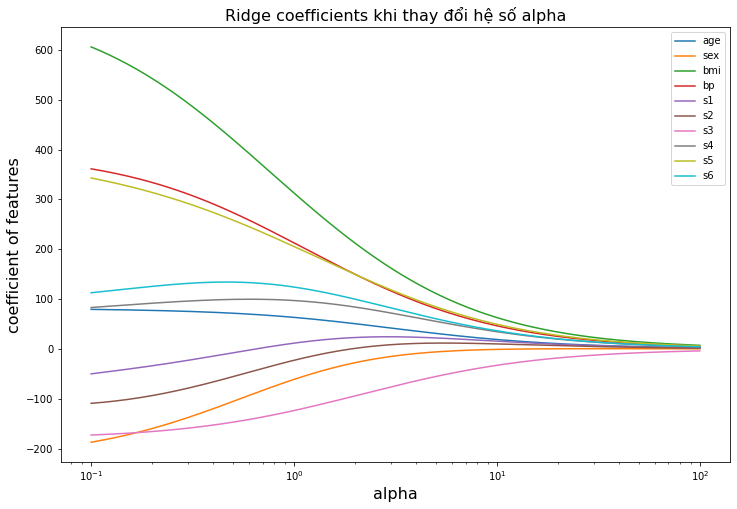

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Thay đổi alphas từ 1 --> 100
n_alphas = 200
alphas = 1/np.logspace(1, -2, n_alphas)
coefs = []

# Huấn luyện model khi alpha thay đổi.
# Khi tăng dần hệ số 𝛼 thì hồi qui Ridge sẽ có xu hướng thu hẹp hệ số ước lượng từ mô hình
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Hiển thị kết quả mô hình cho các hệ số alpha
plt.figure(figsize= (12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
#hiển thị giá trị log
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(features)
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()

## Sự thay đổi của độ lớn các hệ số ước lượng (coefficient of features) theo hệ số điều chuẩn 𝛼. Khi tăng dần độ lớn của 𝛼 thì độ lớn của hệ số ước lượng giảm dần.


# Real data-csv file


### Bên dưới tải xuống và tải tập dữ liệu dưới dạng Pandas DataFrame và tóm tắt hình dạng của tập dữ liệu và năm hàng dữ liệu đầu tiên.

### Tập dữ liệu về nhà ở là tập dữ liệu học máy tiêu chuẩn bao gồm 506 hàng dữ liệu với 13 biến đầu vào số và một biến mục tiêu số.

In [3]:
#  thư viện để đọc file và vẽ đồ thị
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# in file
print(dataframe.shape)
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# thuật ngữ lambda có thể được định cấu hình thông qua đối số “ alpha ” khi định nghĩa lớp. Giá trị mặc định là 1,0 hoặc một hình phạt đầy đủ.
# define model
model = Ridge(alpha=1.0)

In [5]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
# sai số tuyệt đối trung bình (MAE)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 3.382 (0.519)


## Chạy ví dụ phù hợp với mô hình và đưa ra dự đoán cho các hàng dữ liệu mới.

## Chúng tôi có thể quyết định sử dụng hồi quy Ridge làm mô hình cuối cùng của chúng tôi và đưa ra dự đoán về dữ liệu mới.

Điều này có thể đạt được bằng cách điều chỉnh mô hình trên tất cả dữ liệu có sẵn và gọi hàm dự đoán () , truyền vào một hàng dữ liệu mới.

In [8]:
# make a prediction with a ridge regression model on the dataset
from pandas import read_csv
from sklearn.linear_model import Ridge
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.253
